# Exploratory Data Analysis (EDA)

This notebook performs an exploratory data analysis on two datasets:
- **Spotify Dataset**: Contains music track information
- **Grammy Awards Dataset**: Contains Grammy nominations and awards data

## Objectives
1. Load and inspect the datasets
2. Analyze data structure and quality
3. Identify missing values and duplicates
4. Generate descriptive statistics
5. Visualize data distributions and patterns

In [37]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## 1. Data Loading

In [38]:
# Load datasets
spotify_df = pd.read_csv(r"dags\spotify_dataset.csv")
grammy_df = pd.read_csv(r"dags\the_grammy_awards.csv")

print(f"Spotify dataset: {spotify_df.shape[0]:,} rows × {spotify_df.shape[1]} columns")
print(f"Grammy dataset: {grammy_df.shape[0]:,} rows × {grammy_df.shape[1]} columns")

Spotify dataset: 114,000 rows × 21 columns
Grammy dataset: 4,810 rows × 10 columns


---

## 2. Spotify Dataset Analysis

### 2.1 Dataset Overview

In [39]:
# Display basic information
print("=" * 60)
print("SPOTIFY DATASET INFORMATION")
print("=" * 60)
print(f"\nDataset shape: {spotify_df.shape[0]:,} rows × {spotify_df.shape[1]} columns\n")
print("\nColumn names and data types:")
print("-" * 60)
print(spotify_df.dtypes)
print("\n" + "=" * 60)

SPOTIFY DATASET INFORMATION

Dataset shape: 114,000 rows × 21 columns


Column names and data types:
------------------------------------------------------------
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object



In [40]:
# Display first few rows
print("First 5 rows of the dataset:\n")
spotify_df.head()

First 5 rows of the dataset:



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### 2.2 Data Quality Assessment

In [41]:
# Check for missing values and duplicates
null_counts = spotify_df.isnull().sum()
print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "No missing values found!")
print(f"\nDuplicate rows: {spotify_df.duplicated().sum():,}")

artists       1
album_name    1
track_name    1
dtype: int64

Duplicate rows: 0


### 2.3 Descriptive Statistics

In [42]:
# Statistical summary of numerical columns
print("Statistical summary of numerical features:")
spotify_df.describe().round(2)

Statistical summary of numerical features:


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,56999.50,33.24,228029.15,0.57,0.64,5.31,-8.26,0.64,0.08,0.31,0.16,0.21,0.47,122.15,3.90
std,32909.11,22.31,107297.71,0.17,0.25,3.56,5.03,0.48,0.11,0.33,0.31,0.19,0.26,29.98,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28499.75,17.00,174066.00,0.46,0.47,2.00,-10.01,0.00,0.04,0.02,0.00,0.10,0.26,99.22,4.00
50%,56999.50,35.00,212906.00,0.58,0.68,5.00,-7.00,1.00,0.05,0.17,0.00,0.13,0.46,122.02,4.00
75%,85499.25,50.00,261506.00,0.70,0.85,8.00,-5.00,1.00,0.08,0.60,0.05,0.27,0.68,140.07,4.00
max,113999.00,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,1.00,243.37,5.00


### 2.4 Data Distribution Visualizations

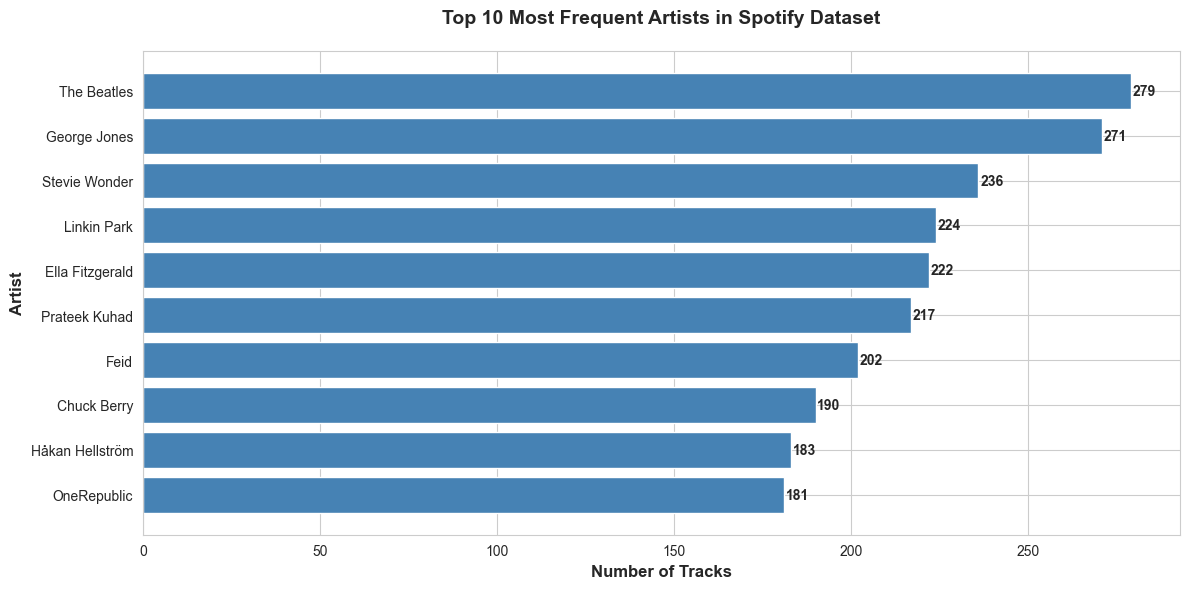

In [43]:
# Top 10 most frequent artists
plt.figure(figsize=(12, 6))
top_artists = spotify_df['artists'].value_counts().head(10)
plt.barh(range(len(top_artists)), top_artists.values, color='steelblue')
plt.yticks(range(len(top_artists)), top_artists.index)
plt.xlabel('Number of Tracks', fontsize=12, fontweight='bold')
plt.ylabel('Artist', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Frequent Artists in Spotify Dataset', fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
for i, v in enumerate(top_artists.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

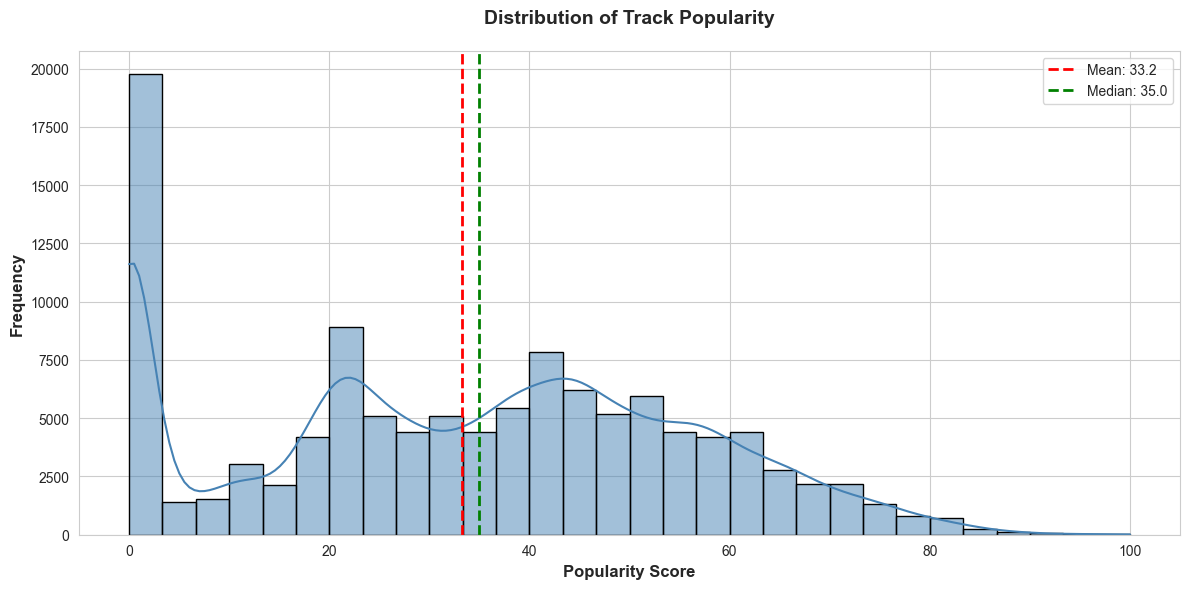

In [44]:
# Distribution of track popularity
plt.figure(figsize=(12, 6))
sns.histplot(spotify_df['popularity'], bins=30, kde=True, color='steelblue', edgecolor='black')
plt.axvline(spotify_df['popularity'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {spotify_df["popularity"].mean():.1f}')
plt.axvline(spotify_df['popularity'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {spotify_df["popularity"].median():.1f}')
plt.title('Distribution of Track Popularity', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Popularity Score', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

C:\Users\juana\AppData\Local\Temp\ipykernel_33472\3102046367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='explicit_label', y='popularity', data=spotify_df, palette='Set2')


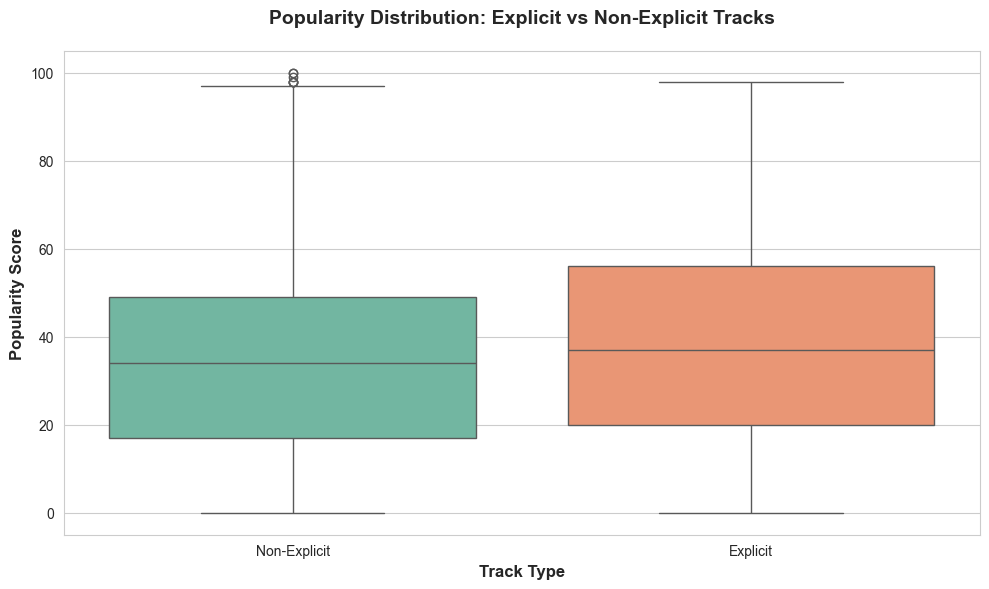

In [45]:
# Popularity comparison: Explicit vs Non-Explicit tracks
spotify_df['explicit_label'] = spotify_df['explicit'].apply(lambda x: 'Explicit' if x else 'Non-Explicit')

plt.figure(figsize=(10, 6))
sns.boxplot(x='explicit_label', y='popularity', data=spotify_df, palette='Set2')
plt.title('Popularity Distribution: Explicit vs Non-Explicit Tracks', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Track Type', fontsize=12, fontweight='bold')
plt.ylabel('Popularity Score', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

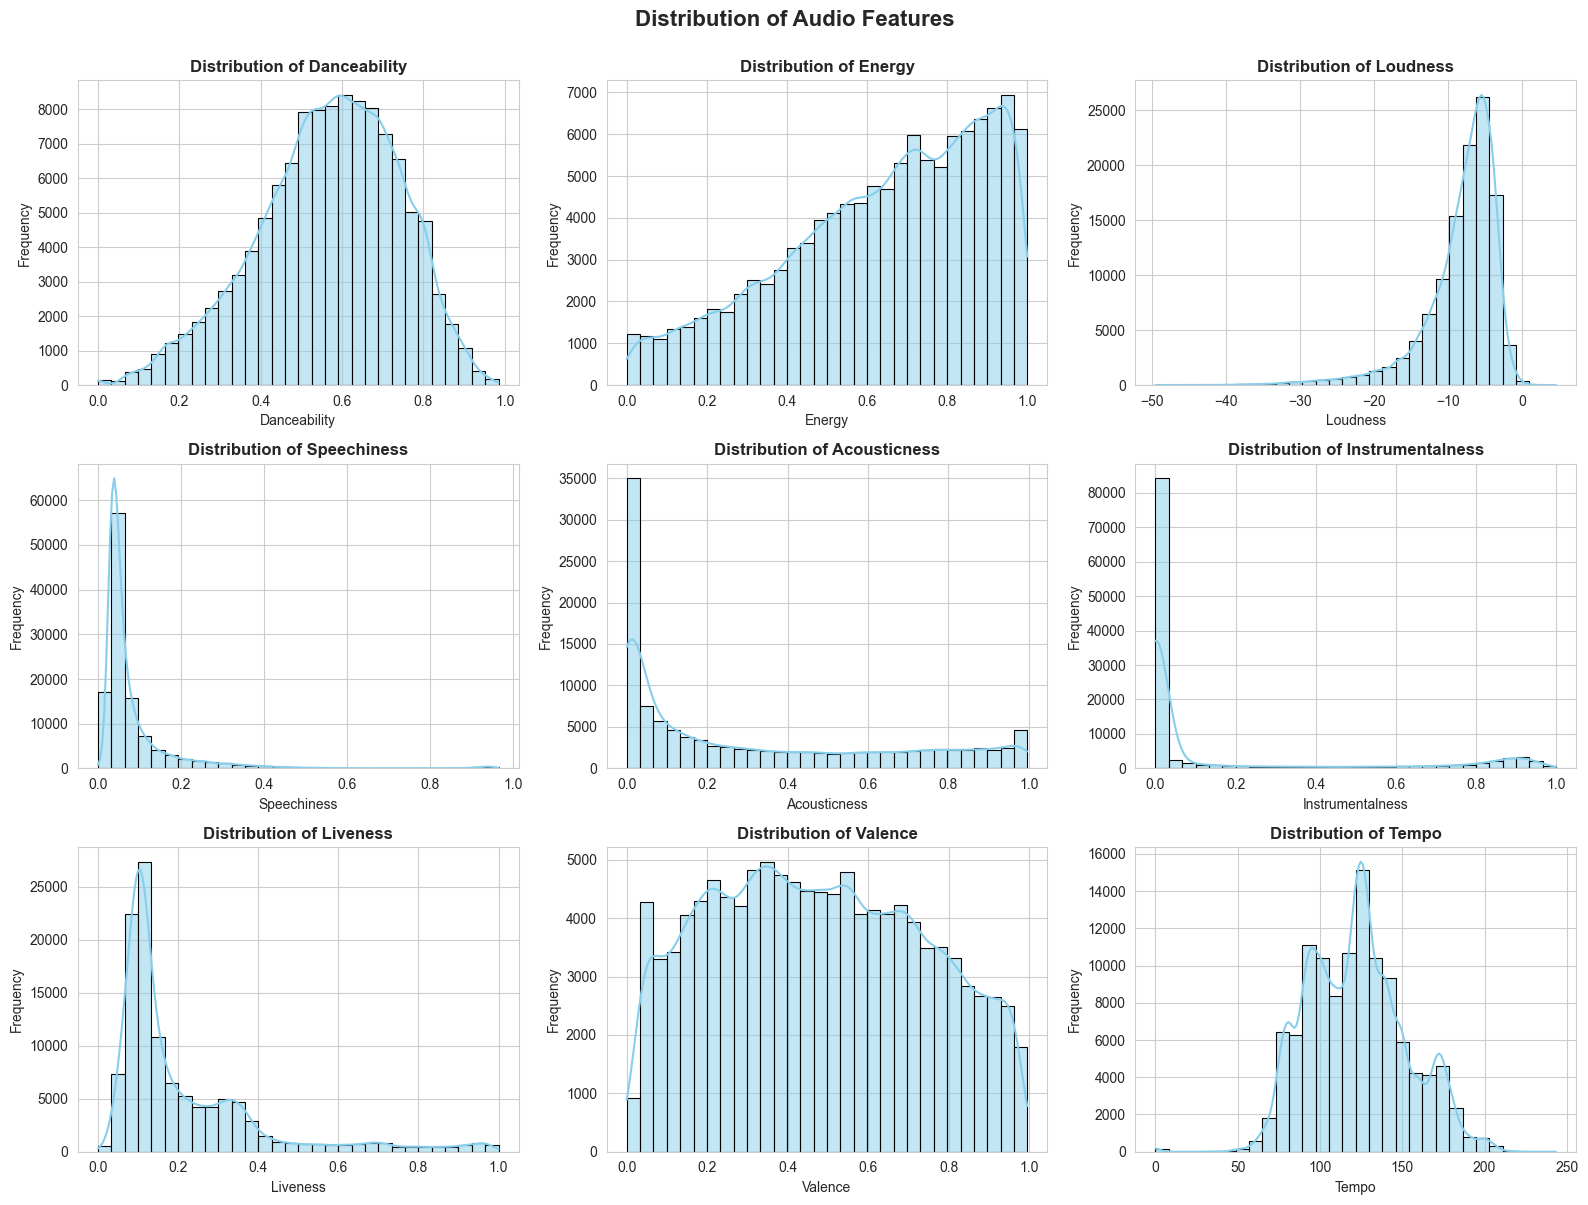

In [46]:
# Distribution of numerical features
numerical_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
available_cols = [col for col in numerical_cols if col in spotify_df.columns]

if available_cols:
    fig, axes = plt.subplots(3, 3, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(available_cols[:9]):
        sns.histplot(spotify_df[col].dropna(), bins=30, kde=True, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col.capitalize()}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col.capitalize(), fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
    
    # Hide unused subplots
    for idx in range(len(available_cols), 9):
        axes[idx].axis('off')
    
    plt.suptitle('Distribution of Audio Features', fontsize=16, fontweight='bold', y=1.0)
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for visualization")

---

## 3. Grammy Awards Dataset Analysis

### 3.1 Dataset Overview

In [47]:
# Display basic information
print("=" * 60)
print("GRAMMY AWARDS DATASET INFORMATION")
print(f"\nDataset shape: {grammy_df.shape[0]:,} rows × {grammy_df.shape[1]} columns\n")
print("\nColumn names and data types:")
print("-" * 60)
print(grammy_df.dtypes)
print("\n" + "=" * 60)

GRAMMY AWARDS DATASET INFORMATION

Dataset shape: 4,810 rows × 10 columns


Column names and data types:
------------------------------------------------------------
year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object



In [48]:
# Display first few rows
print("First 5 rows of the dataset:\n")
grammy_df.head()

First 5 rows of the dataset:



,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


### 3.2 Data Quality Assessment

In [49]:
# Check for missing values and duplicates
print("Missing values per column:")
print("-" * 60)
null_counts = grammy_df.isnull().sum()
print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "No missing values found!")
print(f"\nTotal missing values: {grammy_df.isnull().sum().sum():,}")
print(f"\nDuplicate rows: {grammy_df.duplicated().sum():,}")

Missing values per column:
------------------------------------------------------------
nominee       6
artist     1840
workers    2190
img        1367
dtype: int64

Total missing values: 5,403

Duplicate rows: 0


### 3.3 Descriptive Statistics

In [50]:
# Statistical summary of numerical columns
print("Statistical summary of numerical features:")
print("=" * 60)
grammy_df.describe().round(2)

Statistical summary of numerical features:


,year
count,4810.00
mean,1995.57
std,17.15
min,1958.00
25%,1983.00
50%,1998.00
75%,2010.00
max,2019.00


### 3.4 Data Distribution Visualizations

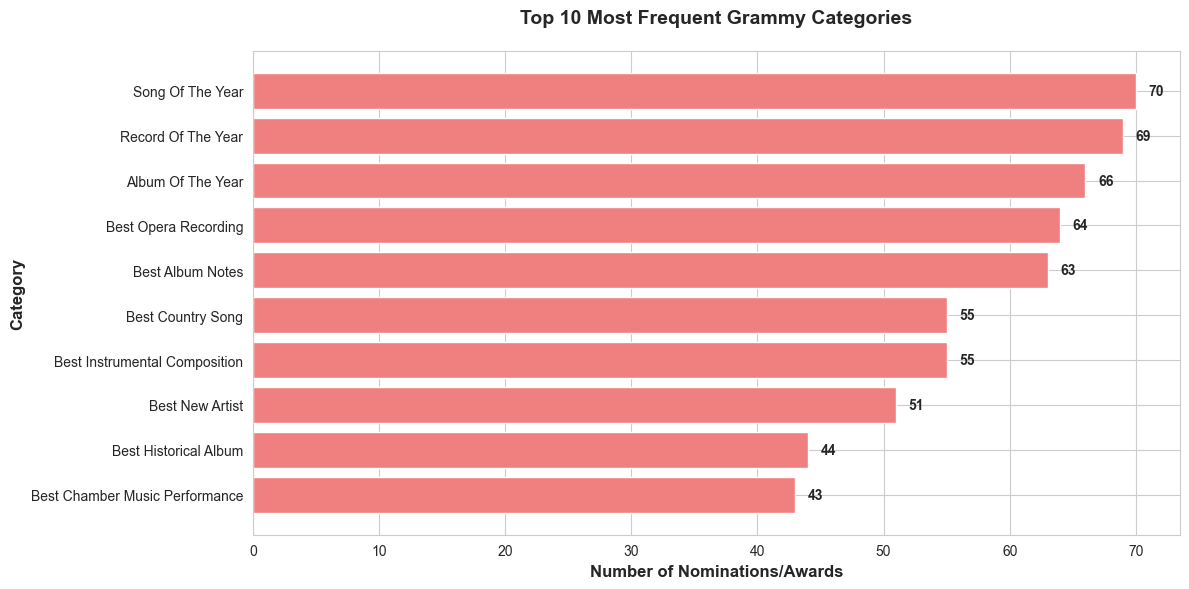

In [51]:
# Top 10 most frequent categories
plt.figure(figsize=(12, 6))
top_categories = grammy_df['category'].value_counts().head(10)
plt.barh(range(len(top_categories)), top_categories.values, color='lightcoral')
plt.yticks(range(len(top_categories)), top_categories.index)
plt.xlabel('Number of Nominations/Awards', fontsize=12, fontweight='bold')
plt.ylabel('Category', fontsize=12, fontweight='bold')
plt.title('Top 10 Most Frequent Grammy Categories', fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
for i, v in enumerate(top_categories.values):
    plt.text(v + 1, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

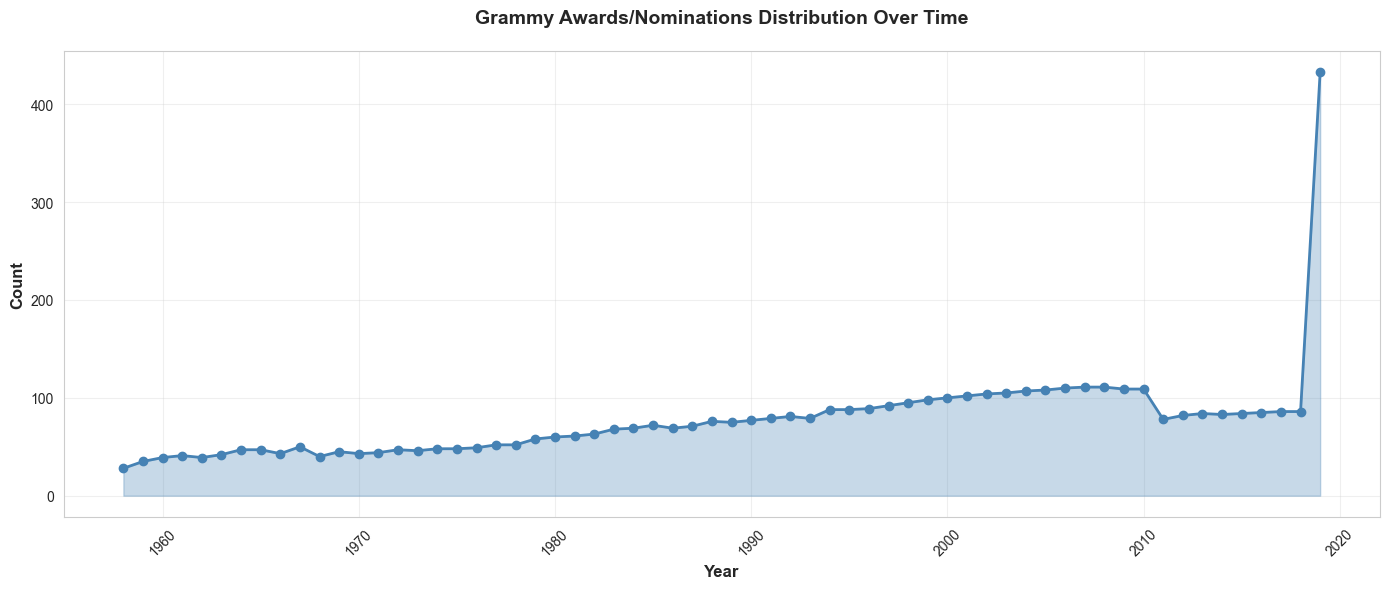

In [52]:
# Distribution of awards/nominations by year
plt.figure(figsize=(14, 6))
year_counts = grammy_df['year'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=6, color='steelblue')
plt.fill_between(year_counts.index, year_counts.values, alpha=0.3, color='steelblue')
plt.title('Grammy Awards/Nominations Distribution Over Time', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

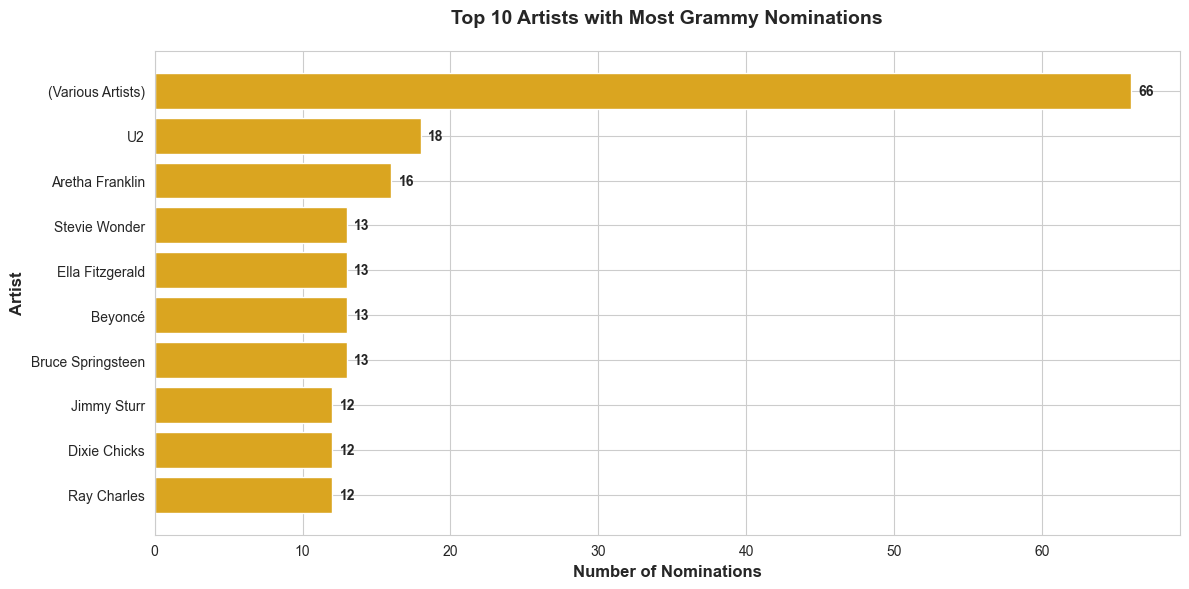

In [53]:
# Top 10 artists with most nominations
plt.figure(figsize=(12, 6))
top_artists_grammy = grammy_df['artist'].value_counts().head(10)
plt.barh(range(len(top_artists_grammy)), top_artists_grammy.values, color='goldenrod')
plt.yticks(range(len(top_artists_grammy)), top_artists_grammy.index)
plt.xlabel('Number of Nominations', fontsize=12, fontweight='bold')
plt.ylabel('Artist', fontsize=12, fontweight='bold')
plt.title('Top 10 Artists with Most Grammy Nominations', fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
for i, v in enumerate(top_artists_grammy.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.show()

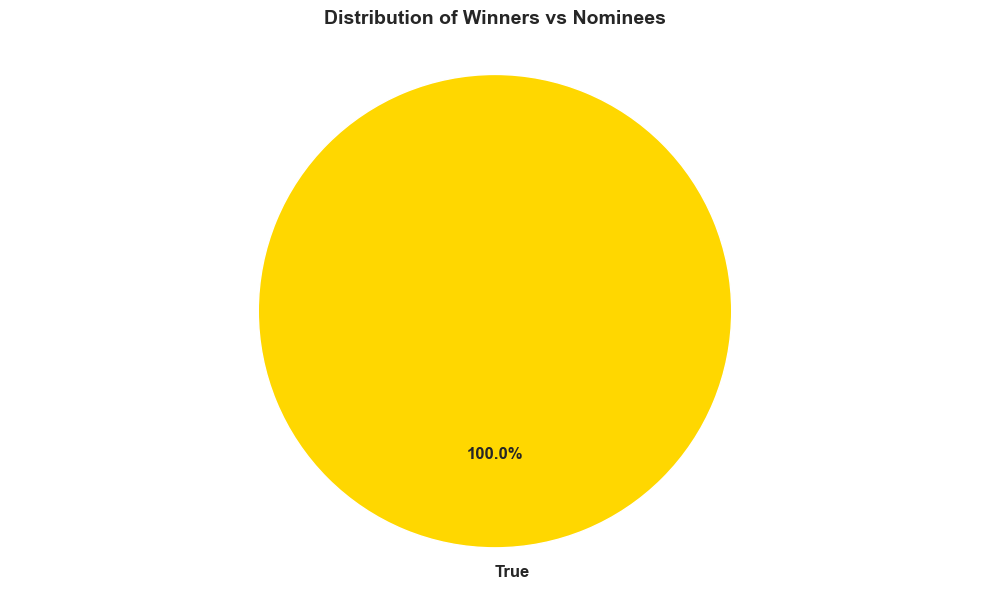

In [54]:
# Distribution of winner status (if column exists)
if 'winner' in grammy_df.columns:
    plt.figure(figsize=(10, 6))
    winner_counts = grammy_df['winner'].value_counts()
    colors = ['gold', 'silver']
    plt.pie(winner_counts.values, labels=winner_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
    plt.title('Distribution of Winners vs Nominees', fontsize=14, fontweight='bold', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
else:
    print("Winner column not found in the dataset")

---

## 4. Outlier Detection

In [55]:
# Detect outliers using Z-score for Spotify dataset
if 'popularity' in spotify_df.columns:
    spotify_df['popularity_zscore'] = zscore(spotify_df['popularity'].fillna(0))
    outliers_spotify = spotify_df[spotify_df['popularity_zscore'].abs() > 3]
    
    print("=" * 60)
    print("OUTLIER DETECTION - SPOTIFY DATASET")
    print("=" * 60)
    print(f"\nTotal outliers found (|Z-score| > 3): {len(outliers_spotify):,}")
    print(f"Percentage of outliers: {(len(outliers_spotify)/len(spotify_df)*100):.2f}%")
    
    if len(outliers_spotify) > 0:
        print(f"\nOutlier Statistics:")
        print(f"  Min popularity: {outliers_spotify['popularity'].min()}")
        print(f"  Max popularity: {outliers_spotify['popularity'].max()}")
        print(f"  Mean popularity: {outliers_spotify['popularity'].mean():.2f}")

OUTLIER DETECTION - SPOTIFY DATASET

Total outliers found (|Z-score| > 3): 0
Percentage of outliers: 0.00%


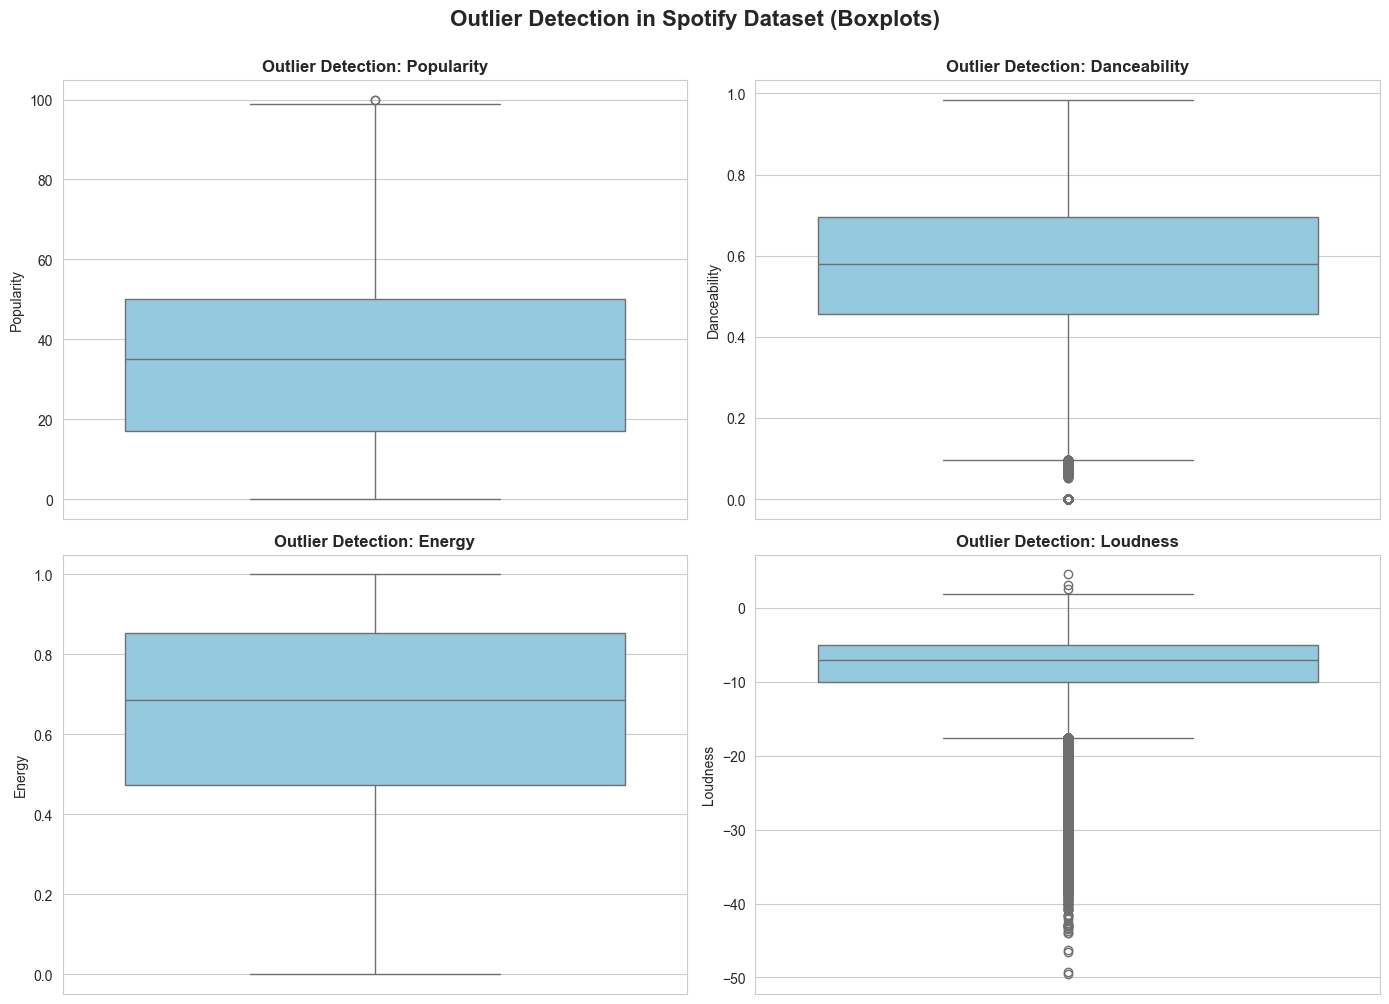

In [56]:
# Boxplot visualization for outlier detection in Spotify dataset
numerical_features = ['popularity', 'danceability', 'energy', 'loudness']
available_features = [col for col in numerical_features if col in spotify_df.columns]

if available_features:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for idx, col in enumerate(available_features[:4]):
        sns.boxplot(y=spotify_df[col], ax=axes[idx], color='skyblue')
        axes[idx].set_title(f'Outlier Detection: {col.capitalize()}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(col.capitalize(), fontsize=10)
    
    # Hide unused subplots
    for idx in range(len(available_features), 4):
        axes[idx].axis('off')
    
    plt.suptitle('Outlier Detection in Spotify Dataset (Boxplots)', fontsize=16, fontweight='bold', y=1.0)
    plt.tight_layout()
    plt.show()

In [57]:
# Detect outliers in Grammy dataset (year distribution)
if 'year' in grammy_df.columns:
    grammy_df['year_zscore'] = zscore(grammy_df['year'].fillna(0))
    outliers_grammy = grammy_df[grammy_df['year_zscore'].abs() > 3]

    print("OUTLIER DETECTION - GRAMMY DATASET")
    print(f"\nTotal outliers found (|Z-score| > 3): {len(outliers_grammy):,}")
    print(f"Percentage of outliers: {(len(outliers_grammy)/len(grammy_df)*100):.2f}%")
    
    if len(outliers_grammy) > 0:
        print(f"\nOutlier Statistics:")
        print(f"  Min year: {int(outliers_grammy['year'].min())}")
        print(f"  Max year: {int(outliers_grammy['year'].max())}")
        print(f"  Mean year: {outliers_grammy['year'].mean():.0f}")

OUTLIER DETECTION - GRAMMY DATASET

Total outliers found (|Z-score| > 3): 0
Percentage of outliers: 0.00%


---

## 5. Key Findings Summary

In [ ]:
# Generate comprehensive summary
print("EXPLORATORY DATA ANALYSIS - SUMMARY REPORT")

print("\n📊 SPOTIFY DATASET SUMMARY")
print(f"  • Total tracks: {len(spotify_df):,}")
print(f"  • Unique artists: {spotify_df['artists'].nunique():,}")
print(f"  • Missing values: {spotify_df.isnull().sum().sum():,}")
print(f"  • Duplicate rows: {spotify_df.duplicated().sum():,}")
if 'popularity' in spotify_df.columns:
    print(f"  • Average popularity: {spotify_df['popularity'].mean():.2f}")
    print(f"  • Popularity range: {spotify_df['popularity'].min()} - {spotify_df['popularity'].max()}")

print("\n🏆 GRAMMY DATASET SUMMARY")
print(f"  • Total records: {len(grammy_df):,}")
print(f"  • Unique artists: {grammy_df['artist'].nunique():,}")
print(f"  • Unique categories: {grammy_df['category'].nunique():,}")
print(f"  • Missing values: {grammy_df.isnull().sum().sum():,}")
print(f"  • Duplicate rows: {grammy_df.duplicated().sum():,}")
if 'year' in grammy_df.columns:
    print(f"  • Year range: {int(grammy_df['year'].min())} - {int(grammy_df['year'].max())}")

EXPLORATORY DATA ANALYSIS - SUMMARY REPORT

📊 SPOTIFY DATASET SUMMARY
----------------------------------------------------------------------
  • Total tracks: 114,000
  • Unique artists: 31,437
  • Missing values: 3
  • Duplicate rows: 0
  • Average popularity: 33.24
  • Popularity range: 0 - 100

🏆 GRAMMY DATASET SUMMARY
----------------------------------------------------------------------
  • Total records: 4,810
  • Unique artists: 1,658
  • Unique categories: 638
  • Missing values: 5,403
  • Duplicate rows: 0
  • Year range: 1958 - 2019
